<a href="https://colab.research.google.com/github/quangdad/DataMining/blob/main/HepatitisB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Tải bộ dữ liệu lên
data = pd.read_csv('patients.csv', header=None, names=['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology'])



In [ ]:
data.head(10)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1,?,120,3.9,?,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           3586 non-null   int64 
 1   Age             3586 non-null   int64 
 2   Sex             3586 non-null   int64 
 3   Steroid         3586 non-null   object
 4   Antivirals      3586 non-null   int64 
 5   Fatigue         3586 non-null   object
 6   Malaise         3586 non-null   object
 7   Anorexia        3586 non-null   object
 8   LiverBig        3586 non-null   object
 9   LiverFirm       3586 non-null   object
 10  SpleenPalpable  3586 non-null   object
 11  Spiders         3586 non-null   object
 12  Ascites         3586 non-null   object
 13  Varices         3586 non-null   object
 14  Bilirubin       3586 non-null   object
 15  AlkPhosphate    3586 non-null   object
 16  SGOT            3586 non-null   object
 17  Albumin         3586 non-null   object
 18  Protime 

In [ ]:
with open('missing_rows.txt', 'a') as f:
    print("Các mẫu bị thiếu thông số:", file=f)
    for i, row in data.isin(['?']).any(axis=1).iteritems():
        if row == True:
            print(f"Mẫu {i+1}:", file=f)
            print(data.iloc[[i]], file=f)


In [3]:
data = data.replace('?', np.nan).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 5 to 3585
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           1936 non-null   int64 
 1   Age             1936 non-null   int64 
 2   Sex             1936 non-null   int64 
 3   Steroid         1936 non-null   object
 4   Antivirals      1936 non-null   int64 
 5   Fatigue         1936 non-null   object
 6   Malaise         1936 non-null   object
 7   Anorexia        1936 non-null   object
 8   LiverBig        1936 non-null   object
 9   LiverFirm       1936 non-null   object
 10  SpleenPalpable  1936 non-null   object
 11  Spiders         1936 non-null   object
 12  Ascites         1936 non-null   object
 13  Varices         1936 non-null   object
 14  Bilirubin       1936 non-null   object
 15  AlkPhosphate    1936 non-null   object
 16  SGOT            1936 non-null   object
 17  Albumin         1936 non-null   object
 18  Protime 

In [ ]:
data.head(10)

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
15,2,38,1,1,2,1,1,1,2,2,2,2,1,2,2,72,89,2.9,46,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
19,2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.7,70,28,4.2,62,1
20,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.9,48,20,4.2,64,1


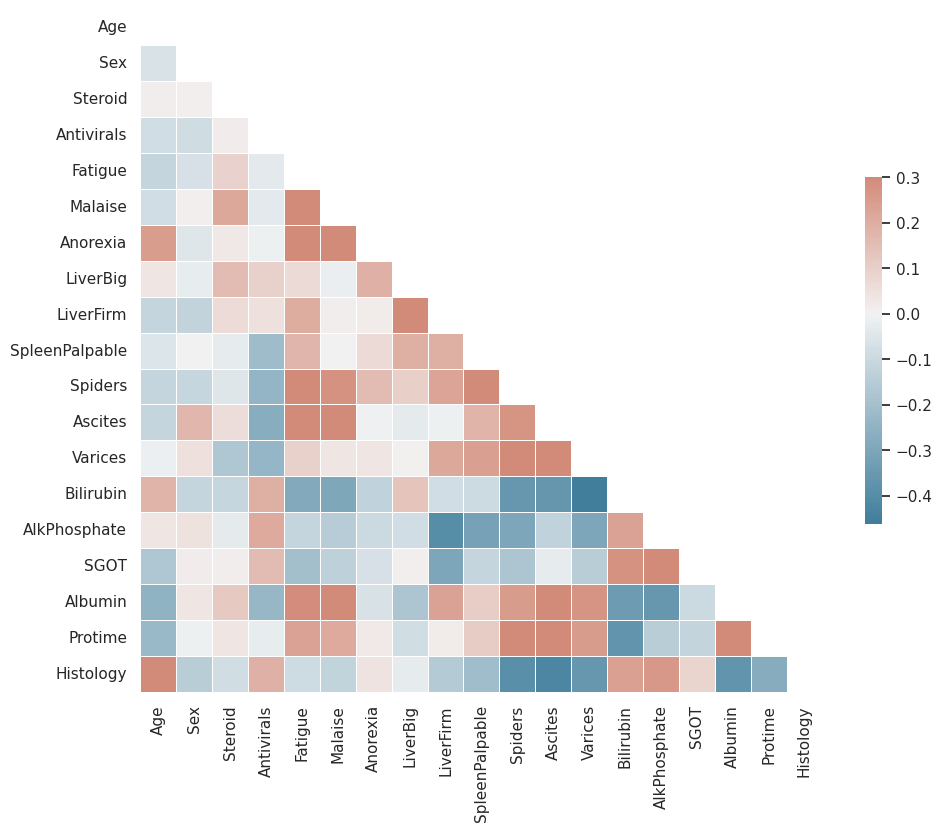

In [ ]:

import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Chuẩn hóa dữ liệu các thuộc tính số
numeric_columns = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Histology']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vẽ biểu đồ tương quan giữa các thuộc tính
sns.set(style="white")
corr = data.drop('Class', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


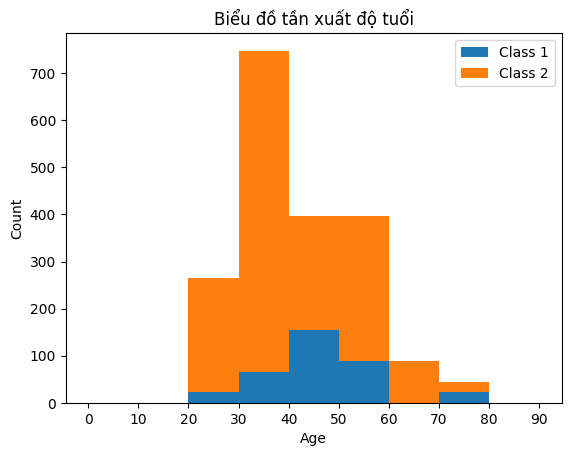

In [4]:
# Tạo biểu đồ Tuổi theo Lớp
plt.hist([data[data['Class'] == 1]['Age'], data[data['Class'] == 2]['Age']], bins=range(0, 100, 10), stacked=True)

# Thêm nhãn và tiêu đề
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 100, 10))
plt.title('Biểu đồ tần xuất độ tuổi')

# Thêm chú thích
plt.legend(['Class 1', 'Class 2'])
plt.show()

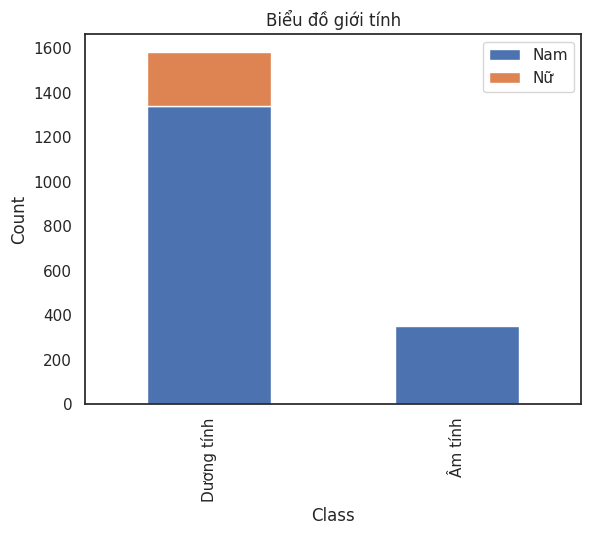

In [ ]:
# Thay thế các giá trị trong cột Class
data['Class'] = data['Class'].replace({1: 'Âm tính', 2: 'Dương tính'})

# Nhóm dữ liệu theo Lớp và Giới tính, đồng thời tạo biểu đồ thanh xếp chồng lên nhau
steroid = data.groupby(['Class', 'Sex']).size().unstack(fill_value=0)
steroid.plot(kind='bar', stacked=True)

# Đặt nhãn và tiêu đề
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Biểu đồ giới tính')

# Đặt chú giải và nhãn của nó
plt.legend(['Nam', 'Nữ'])

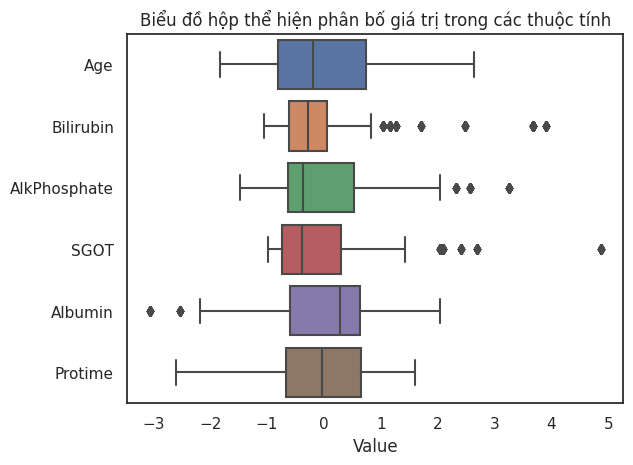

In [ ]:
# Chọn cột số
numerical_cols = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Tạo biểu đồ hộp gồm các cột số
sns.boxplot(data=data[numerical_cols], orient='h')

# Thêm nhãn và tiêu đề
plt.xlabel('Value')
plt.title('Biểu đồ hộp thể hiện phân bố giá trị trong các thuộc tính')
plt.show()


In [5]:
# Thêm thuộc tính mới 'LiverQuality' - Chất lượng gan
def liver_quality(row):
    if float(row['Bilirubin']) > 1.2 and float(row['Albumin']) < 3.5:
        return 0 # Kém
    else:
        return 1 # Tốt


data['LiverQuality'] = data.apply(liver_quality, axis=1)

In [6]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop(['Class', 'LiverQuality'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Tạo mô hình Decision Tree và huấn luyện trên tập huấn luyện
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

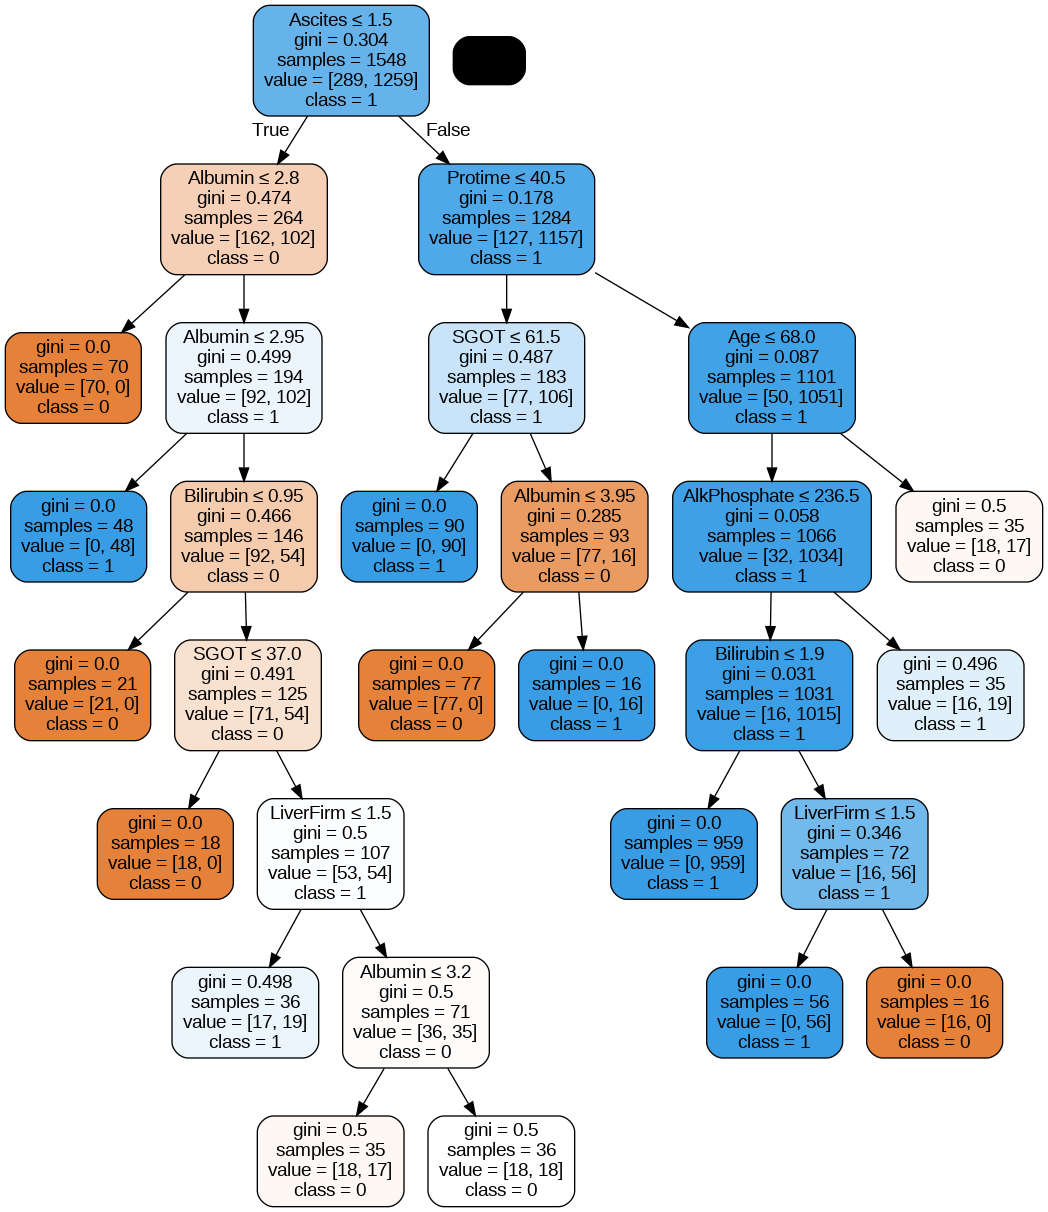

In [23]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X_train.columns.tolist(),  
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [10]:
# Tạo mô hình Random Forest và huấn luyện trên tập huấn luyện
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

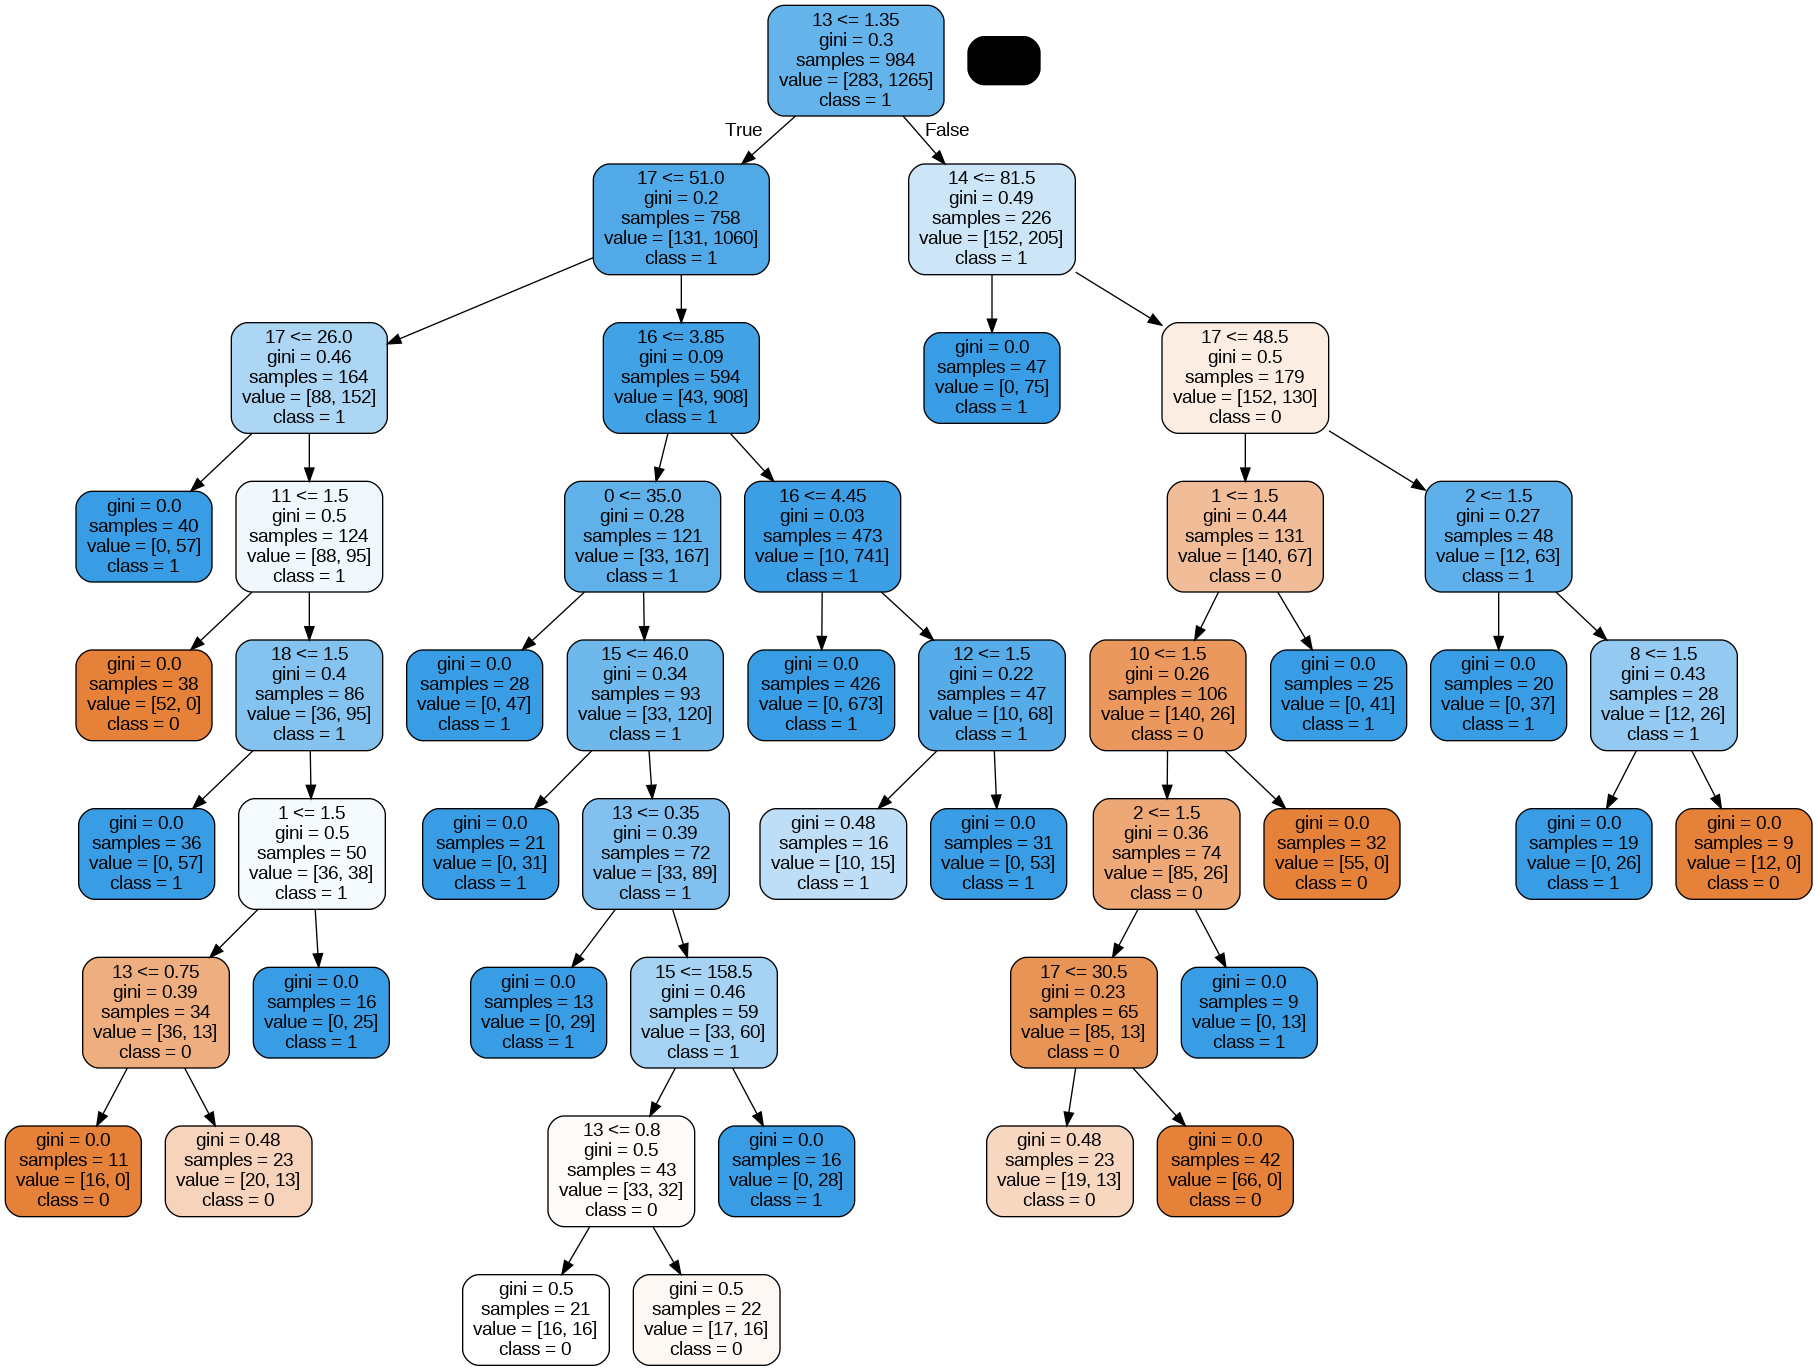

In [24]:
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# trích xuất cây đầu tiên từ mô hình Random Forest
tree = rf_model.estimators_[0]

# tạo file .dot từ cây quyết định
dot_data = export_graphviz(tree, out_file=None, 
                     feature_names = list(range(19)),
                     class_names = ['0', '1'],
                     rounded = True, proportion = False, 
                     precision = 2, filled = True)

# tạo biểu đồ từ file .dot
graph = pydotplus.graph_from_dot_data(dot_data)

# hiển thị biểu đồ
Image(graph.create_png())


In [ ]:
from sklearn.metrics import confusion_matrix
dt_y_pred = dt_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print('Decision Tree Confusion Matrix:\n', dt_confusion_matrix)
print('Random Forest Confusion Matrix:\n', rf_confusion_matrix)


Decision Tree Confusion Matrix:
 [[ 52  11]
 [ 14 311]]
Random Forest Confusion Matrix:
 [[ 48  15]
 [ 10 315]]


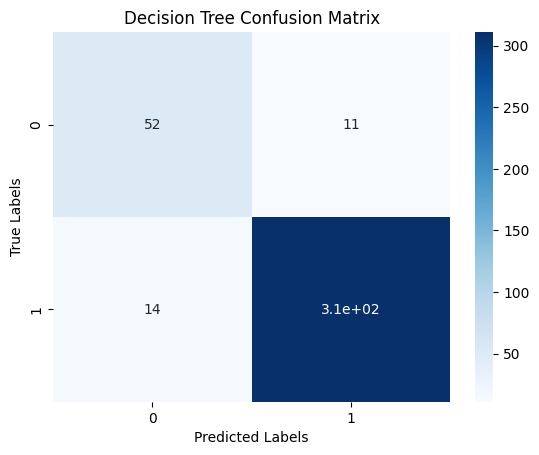

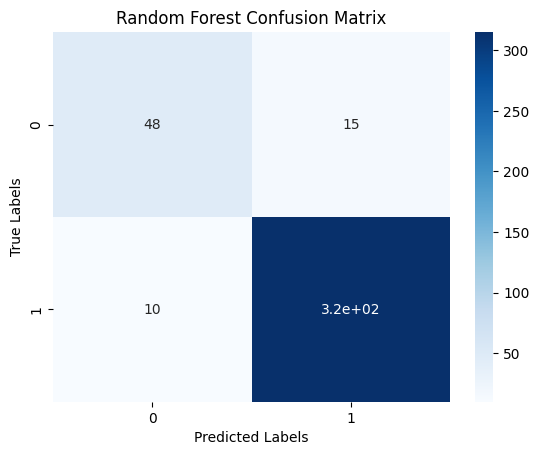

In [ ]:
import seaborn as sns

sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
dt_predictions = []
rf_predictions = []

for i in range(len(data)):
  sample = data.iloc[[i]]
  sample2 = data.iloc[[i]]
  dt_prediction = dt_model.predict(sample2.drop(['Class', 'LiverQuality'], axis=1))[0]
  rf_prediction = rf_model.predict(sample2.drop(['Class', 'LiverQuality'], axis=1))[0]
  liver_quality = 'tốt' if sample['LiverQuality'].values[0] == 1 else 'kém'
  if dt_prediction == 1:
    dt_predictions.append(f'Mẫu {i+1}: Không nhiễm viêm gan B, gan {liver_quality}')
  else:
    dt_predictions.append(f'Mẫu {i+1}: Bị nhiễm virus viêm gan B')
  if rf_prediction == 1:
    rf_predictions.append(f'Mẫu {i+1}: Không nhiễm viêm gan B, gan {liver_quality}')
  else:
    rf_predictions.append(f'Mẫu {i+1}: Bị nhiễm virus viêm gan B')

print('Kết quả chuẩn đoán của Decision Tree và Random Forest:')
for dt, rf in zip(dt_predictions, rf_predictions):
  print(f'Decision tree:',dt, ' -------- ','Random forest:', rf)

Kết quả chuẩn đoán của Decision Tree và Random Forest:
Decision tree: Mẫu 1: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 1: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 2: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 2: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 3: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 3: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 4: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 4: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 5: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 5: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 6: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 6: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 7: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 7: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 8: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 8: Bị nhiễm virus viêm gan B
Decision tree: Mẫu 9: Bị nhiễm virus viêm gan B  --------  Random forest: Mẫu 9: Bị nhiễm